# Titanic/ДЗ 4-6 (Лучкин ИУ6-51Б, Павловский ИУ6-51Б, Левашова ИУ6-53Б)

# ДЗ4 - ПРЕДОБРАБОТКА ДАННЫХ

## 4.1) Найти датасет titanic и загрузить его

In [507]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [508]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 4.2) проверим, в каких столбцах есть пустые ячейки

In [509]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

## 4.3) проведём предобработку данных

### много незаполненных данных о номере кабины

In [510]:
df['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [511]:
df.Cabin = df.Cabin.fillna('N')

cabin_only = df[['Cabin']].copy()
cabin_only['Deck'] = cabin_only['Cabin'].str.slice(0,1)
cabin_only['Room'] = cabin_only['Cabin'].str.slice(1,5).str.extract('([0-9]+)', expand=False).astype('float')
cabin_only.Room = cabin_only.Room.fillna(0.0)
mapping = {'N': 0, 'C': 1, 'B': 2, 'D': 3, 'E': 4, 'A': 5, 'F': 6, 'G': 7, 'T': 8}
cabin_only = cabin_only.replace({'Deck': mapping})

df.Cabin = cabin_only.Deck * 1000 + cabin_only.Room
cabin_only

,Cabin,Deck,Room
0,N,0,0.0
1,C85,1,85.0
2,N,0,0.0
3,C123,1,123.0
4,N,0,0.0
...,...,...,...
886,N,0,0.0
887,B42,2,42.0
888,N,0,0.0
889,C148,1,148.0


### предобрабока остальных столбцов

In [512]:
#df.Embarked.fillna(df.Embarked.mode()[0], inplace = True)
#mapping = {'S': 1, 'C': 2, 'Q': 3}
#df = df.replace({'Embarked': mapping})
df.Age.fillna(df.Age.median(), inplace = True)
mapping = {'male': 0, 'female': 1}
df = df.replace({'Sex': mapping})

### удаляем ненужные данные

для выживания не важно имя, номер билета и пункт посадки пассажира

In [513]:
df = df.drop(['Name', 'Ticket', 'Embarked'], axis=1)

## 4.4) результат предобработки данных

In [514]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Cabin          False
dtype: bool

In [515]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,1085.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,1123.0
4,5,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0.0
887,888,1,1,1,19.0,0,0,30.0000,2042.0
888,889,0,3,1,28.0,1,2,23.4500,0.0
889,890,1,1,0,26.0,0,0,30.0000,1148.0


# ДЗ5 - ОЦЕНКА МОДЕЛЕЙ И РЕГУЛЯРИЗАЦИЯ

In [516]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metr

## 5.1) собираем фичи и таргет данные и создаём тренировочную и тестовую группы

In [517]:
y = np.array(df['Survived'])
y = y.reshape((y.shape[0], 1))
print(y.shape)
X = np.array(df.drop(['Survived'], axis=1))
print(X.shape)

TRAIN_TEST_RATIO = 0.8 # доля экземпляров в тренировочном датасете
train_number = round(X.shape[0] * TRAIN_TEST_RATIO) # количество экземпляров в тренировочном датасете

X_train = X[:train_number] # избегание ошибки с одномерным массивом
y_train = y[:train_number]

X_test = X[train_number:] # избегание ошибки с одномерным массивом
y_test = y[train_number:]

print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

(891, 1)
(891, 8)
X_train.shape: (713, 8)
y_train.shape: (713, 1)
X_test.shape: (178, 8)
y_test.shape: (178, 1)


## 5.2) создаём и обучаем нашу модель, используя кросвалидацию

In [518]:
from sklearn.model_selection import KFold, cross_validate
k_fold = KFold(n_splits=4, shuffle=True, random_state=1000)
model = LogisticRegression(random_state=0)
results = cross_validate(model, X_train, y_train, cv = k_fold, return_estimator=True)
id_max = np.argmax(results['test_score'], axis=None, out=None)
model = results['estimator'][id_max]

C:\Users\fluch\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fluch\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\fluch\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a

## 5.3) даём модели тестовые данные

In [519]:
y_pred = model.predict(X_test)

## 5.4) смотрим значения метрик обученной модели

 accuracy  0.8314606741573034
 precision  0.746268656716418
 recall  0.7936507936507936
 confusion matrix


<AxesSubplot:>

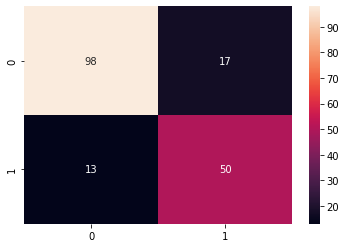

In [520]:
print(f"\033[1;32m accuracy " + f"\033[1;33m {metr.accuracy_score(y_test, y_pred)}")
print(f"\033[1;32m precision " + f"\033[1;33m {metr.precision_score(y_test, y_pred)}")
print(f"\033[1;32m recall " + f"\033[1;33m {metr.recall_score(y_test, y_pred)}")
print(f"\033[1;32m confusion matrix")
cf_matrix = metr.confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot = True)

In [521]:
print(f"\033[1;32m F1 score " + f"\033[1;33m {metr.f1_score(y_test, y_pred)}")

 F1 score  0.7692307692307693


 ROC AUC  0.8229123533471359


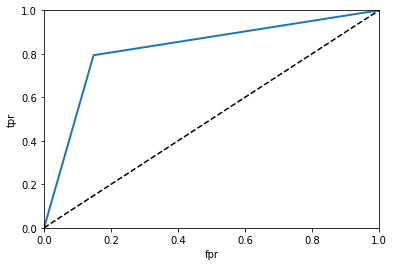

In [522]:
print(f"\033[1;32m ROC AUC " + f"\033[1;33m {metr.roc_auc_score(y_test, y_pred)}")
fpr, tpr, thresholds = metr.roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("fpr")
    plt.ylabel("tpr")
plot_roc_curve(fpr, tpr)
plt.show()

# ДЗ6 - АНСАМБЛИ МОДЕЛЕЙ

https://www.youtube.com/watch?v=59MsmmgAxmY

https://succinct-daisy-9b4.notion.site/6-45c7ea6ac4cb4e3585326d5da338dea2

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

## 6.1) создаём и обучаем нашу модель RandomForest, используя кросвалидацию

In [523]:
from sklearn.ensemble import RandomForestClassifier
model_random_forest = RandomForestClassifier(max_depth=5, random_state=0, n_estimators = 40)
results_random_forest = cross_validate(model_random_forest, X_train, y_train, cv = k_fold, return_estimator=True)
id_max = np.argmax(results_random_forest['test_score'], axis=None, out=None)
model_random_forest = results_random_forest['estimator'][id_max]
#model_random_forest.fit(X_train, y_train)
#model_random_forest.score(X_train, y_train)

C:\Users\fluch\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fluch\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fluch\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fluch\AppData\Local\Programs\Pytho

## 6.2) даём модели RandomForest тестовые данные

In [524]:
y_pred = model_random_forest.predict(X_test)

## 6.3) смотрим значения метрик обученной модели RandomForest

 accuracy  0.8651685393258427
 precision  0.76
 recall  0.9047619047619048
 confusion matrix


<AxesSubplot:>

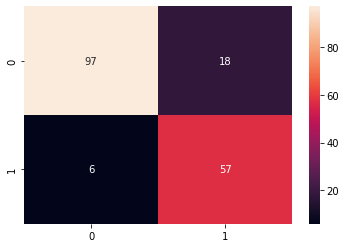

In [525]:
print(f"\033[1;32m accuracy " + f"\033[1;33m {metr.accuracy_score(y_test, y_pred)}")
print(f"\033[1;32m precision " + f"\033[1;33m {metr.precision_score(y_test, y_pred)}")
print(f"\033[1;32m recall " + f"\033[1;33m {metr.recall_score(y_test, y_pred)}")
print(f"\033[1;32m confusion matrix")
cf_matrix = metr.confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot = True)

In [526]:
print(f"\033[1;32m F1 score " + f"\033[1;33m {metr.f1_score(y_test, y_pred)}")

 F1 score  0.8260869565217391


 ROC AUC  0.874120082815735


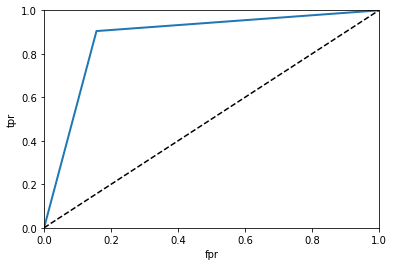

In [527]:
print(f"\033[1;32m ROC AUC " + f"\033[1;33m {metr.roc_auc_score(y_test, y_pred)}")
fpr, tpr, thresholds = metr.roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("fpr")
    plt.ylabel("tpr")
plot_roc_curve(fpr, tpr)
plt.show()

## 6.4) создаём и обучаем нашу модель GradientBoosting, используя кросвалидацию

In [528]:
from sklearn.ensemble import GradientBoostingClassifier
model_gradient_boost = GradientBoostingClassifier(max_depth=4, random_state=0, n_estimators = 10, learning_rate = 0.3)
results_gradient_boost = cross_validate(model_gradient_boost, X_train, y_train, cv = k_fold, return_estimator=True)
id_max = np.argmax(results_gradient_boost['test_score'], axis=None, out=None)
model_gradient_boost = results_gradient_boost['estimator'][id_max]


C:\Users\fluch\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fluch\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fluch\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fluch\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A colu

## 6.5) даём модели GradientBoosting тестовые данные

In [529]:
y_pred = model_gradient_boost.predict(X_test)

## 6.6) смотрим значения метрик обученной модели GradientBoosting

 accuracy  0.8370786516853933
 precision  0.7125
 recall  0.9047619047619048
 confusion matrix


<AxesSubplot:>

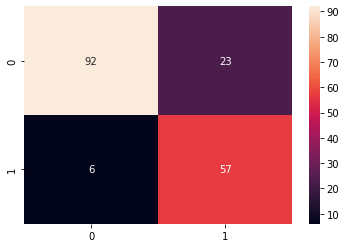

In [530]:
print(f"\033[1;32m accuracy " + f"\033[1;33m {metr.accuracy_score(y_test, y_pred)}")
print(f"\033[1;32m precision " + f"\033[1;33m {metr.precision_score(y_test, y_pred)}")
print(f"\033[1;32m recall " + f"\033[1;33m {metr.recall_score(y_test, y_pred)}")
print(f"\033[1;32m confusion matrix")
cf_matrix = metr.confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot = True)

In [531]:
print(f"\033[1;32m F1 score " + f"\033[1;33m {metr.f1_score(y_test, y_pred)}")

 F1 score  0.7972027972027972


 ROC AUC  0.8523809523809524


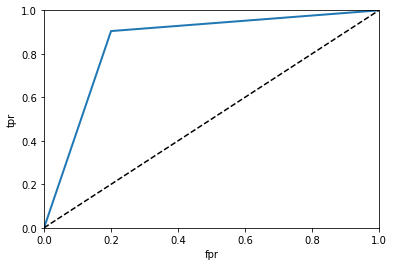

In [532]:
print(f"\033[1;32m ROC AUC " + f"\033[1;33m {metr.roc_auc_score(y_test, y_pred)}")
fpr, tpr, thresholds = metr.roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("fpr")
    plt.ylabel("tpr")
plot_roc_curve(fpr, tpr)
plt.show()

# Вывод

## 1) предобработка данных может занять больше времени, чем работа с моделями
## 2) кросвалидация помогает защититься от выбросов, во время обучения модели
## 3) ансамбли моделей повышают качество обучения моделей, если не накосячить с параметрами :)

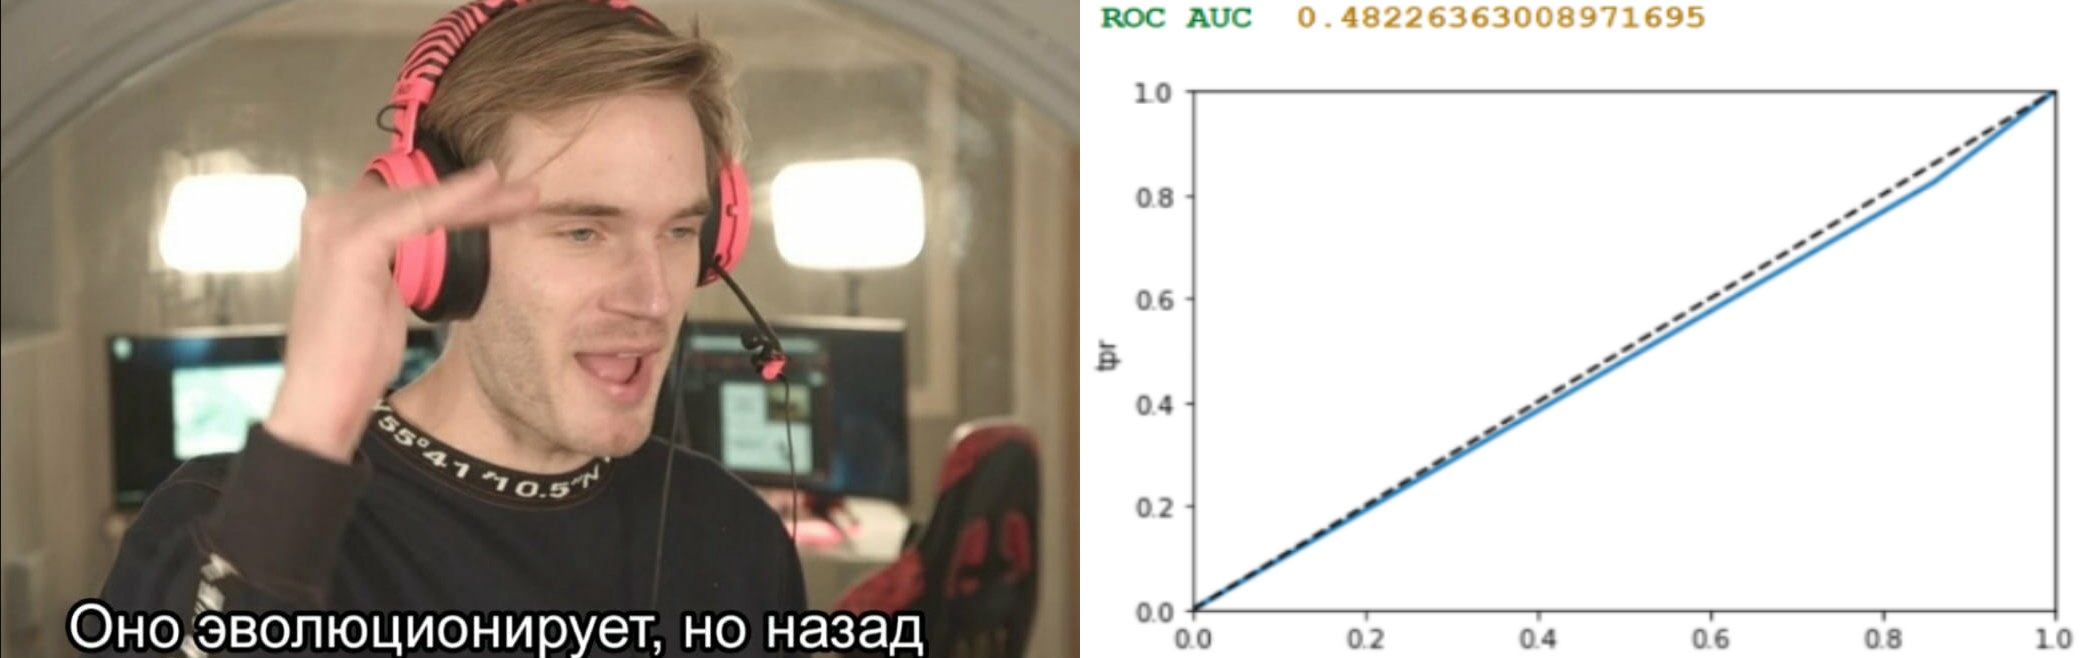

In [533]:
from PIL import Image
from urllib.request import urlopen
url = "https://sun9-53.userapi.com/impg/jA57pCQHKa-aw7jkWOhnEuOeqY1MDgvz10JACQ/f-UtJKfzvBg.jpg?size=2086x658&quality=95&sign=3bf3255e905a8f64f98c44ed0fe69721&type=album"
Image.open(urlopen(url))